In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import json
from scipy import stats

In [3]:
df = pd.read_csv('IT1110E - (2022-2).csv')

In [4]:
df

,ID,Nhóm,Điểm tổng,Điểm tối đa,Điểm quy đổi,unittest,statements about dict,binary mode,Inheritance three levels,lt operator,...,less operator,inheritance,inheritance (copy),inheritance (copy) (copy),inhe init,inhe init (copy),inhe init (copy) (copy),loop str,loop str (copy),loop str (copy) (copy)
0,341,Teacher,Chưa làm,0,0,Không có,Không có,Không có,Không có,Không có,...,Không có,Không có,Không có,Không có,Không có,Không có,Không có,Không có,Không có,Không có
1,1163,Kíp 1,27,90,30,0,1,0,1,1,...,Không có,0,Không có,Không có,Không có,0,Không có,Không có,Không có,1
2,12024,Default Group,10,90,11.11,Chưa làm,Chưa làm,Chưa làm,Chưa làm,Chưa làm,...,Không có,Chưa làm,Không có,Không có,Không có,Chưa làm,Không có,Chưa làm,Không có,Không có
3,12506,Kíp 1,31,90,34.44,1,0.25,0,1,1,...,Không có,Không có,1,Không có,0,Không có,Không có,Không có,Không có,0
4,12536,Kíp 1,49.17,90,54.63,0,1,1,1,1,...,0,Không có,0,Không có,Không có,1,Không có,1,Không có,Không có
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,42128,Kíp 1,41.5,90,46.11,1,1,0,1,1,...,0,Không có,1,Không có,Không có,Không có,1,Không có,1,Không có
170,42129,Kíp 1,49,90,54.44,0,1,0,1,1,...,0,Không có,Không có,1,Không có,Không có,1,1,Không có,Không có
171,42130,Kíp 1,22.5,90,25,1,0.5,1,1,0,...,Không có,Không có,1,Không có,Không có,Không có,1,Không có,Không có,0
172,42131,Kíp 1,27,90,30,1,1,0,0,1,...,Không có,Không có,Không có,Chưa làm,Không có,Chưa làm,Không có,Không có,Không có,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Math       200 non-null    float64
 1   Physic     200 non-null    float64
 2   Chemistry  200 non-null    float64
 3   Biography  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
if(df.isna().sum().sum() != 0):
    for col in df.columns:
        if(df[col].isnull().any()):
            df[col].fillna(0, inplace=True)

In [6]:
data_analyze = {}

In [7]:
def process_and_save_plot(df, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for column_name in df.columns:
        # Tạo bảng thống kê từ cột cần xử lý
        df_temp = df[column_name]
        
        
        #Thong ke diem và so lan xuat hien
        thong_ke = df_temp.value_counts().sort_index()
        thong_ke = thong_ke.rename_axis('score').reset_index(name='number_appearance')
        # print(thong_ke)
        total_score=thong_ke['number_appearance'].sum()
        plt.figure(figsize=(10, 6))
        
        ax = sns.barplot(x='score', y='number_appearance', data=thong_ke, color='skyblue')
        # ax = sns.lineplot(x="score", y="number_appearance", data=thong_ke, color='skyblue') 
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')



        # Đặt tên cho trục x và trục y
        plt.title(f'Biểu đồ phân phối điểm của môn  {column_name}')
        plt.xlabel('Điểm')
        plt.ylabel('Số lần xuất hiện')
        
        
        plt.savefig(os.path.join(save_path, f'{column_name}_distribution.jpg'))
        #plt.show()
        
        #Tim diem cao nhat, thap nhat va so lan xuat hien cua no
        max_score = thong_ke['score'].max()
        max_score_frequency = thong_ke.loc[thong_ke['score'].idxmax(), 'number_appearance']
        min_score = thong_ke['score'].min()
        min_score_frequency = thong_ke.loc[thong_ke['score'].idxmin(), 'number_appearance']
        
        #Diem co so lan xuat hien nhieu nhat, va diem do
        highest_appearances = thong_ke.loc[thong_ke['number_appearance'].idxmax(), 'number_appearance']
        score_highest_appearances = thong_ke[thong_ke['number_appearance'] == highest_appearances]['score'].values
        
        
        second_max_appearances = thong_ke[thong_ke['number_appearance'] < highest_appearances]['number_appearance'].max()
        second_max_score_row = thong_ke[thong_ke['number_appearance'] == second_max_appearances]
        print(second_max_appearances)
        
        
        #So luong diem > 8
        total_scores_above_eight = (thong_ke[thong_ke['score'] >= 8]['number_appearance']).sum()
        total_scores_below_four = (thong_ke[thong_ke['score'] <=4]['number_appearance']).sum()
        data_analyze[column_name] = {
            'total_score': int(total_score),
            'total_scores_above_eight': int(total_scores_above_eight),
            'total_scores_below_four': int(total_scores_below_four),
            'max_score': max_score,
            'max_score_frequency': int(max_score_frequency),
            'min_score': min_score,
            'min_score_frequency': int(min_score_frequency),
            'highest_appearances': int(highest_appearances),
            'score_highest_appearances': list(score_highest_appearances)
        }
        
    
    with open('summary.json', 'w') as file:
        json.dump(data_analyze, file)

15
14
14
15


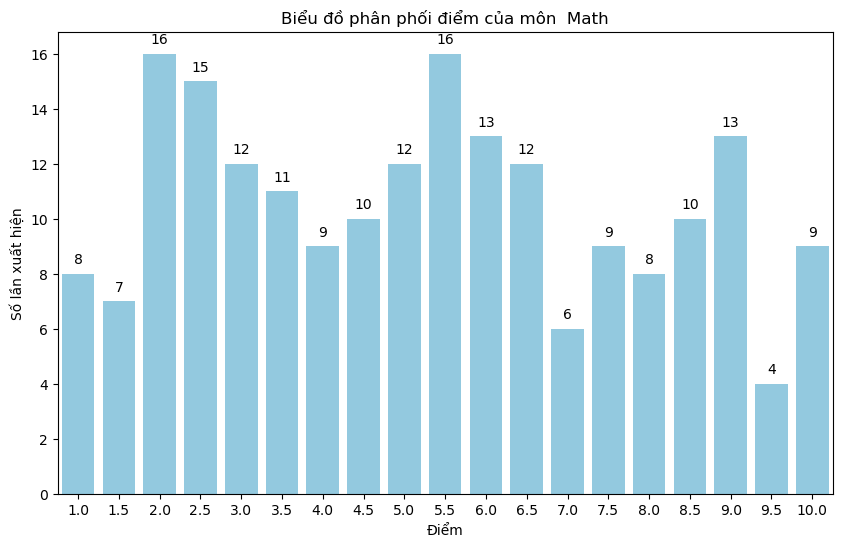

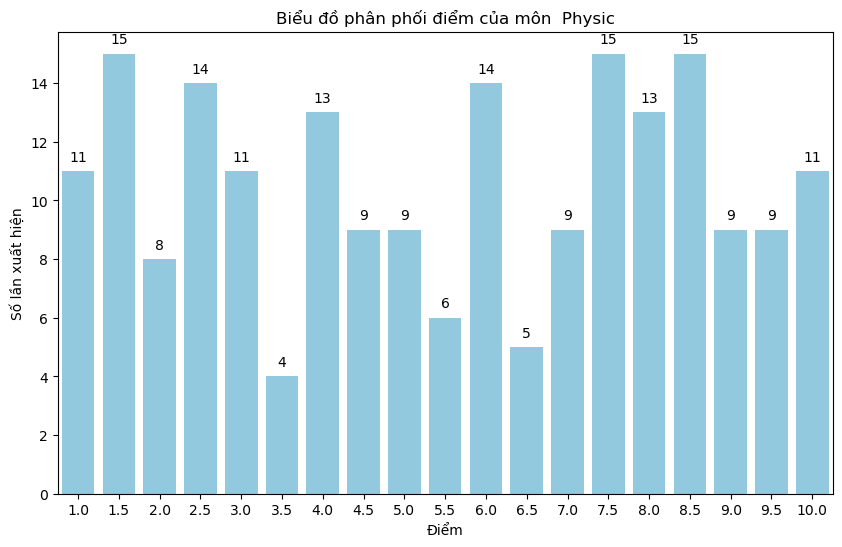

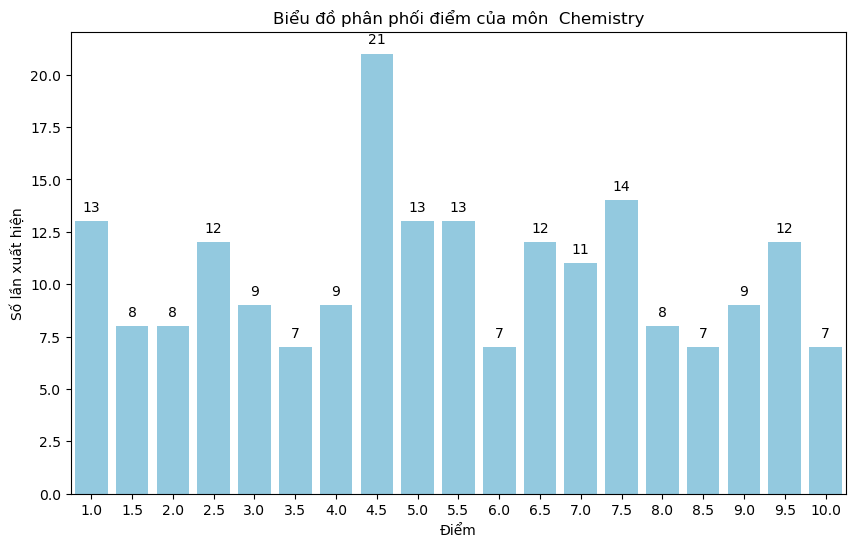

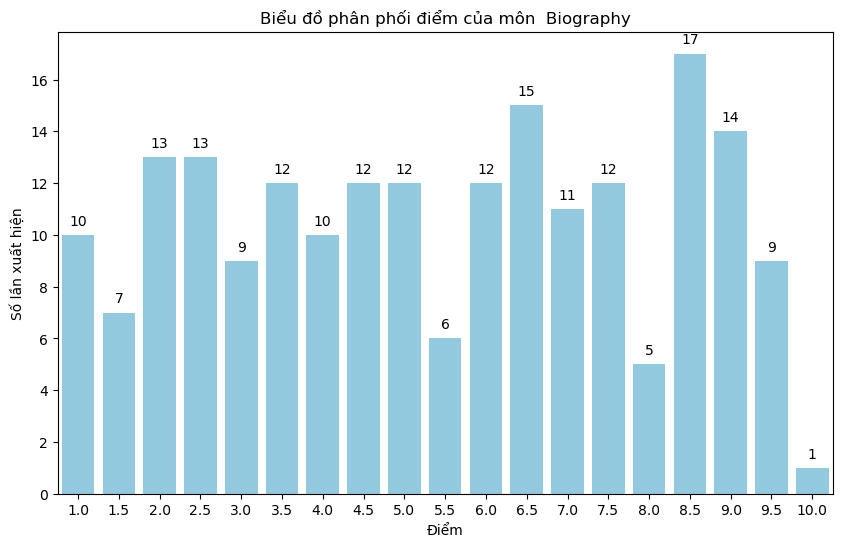

In [23]:
process_and_save_plot(df, 'data')

In [42]:
alpha = 0.05

def check_normal_distribution(df_temp):
    df_score = df_temp.rename_axis('index').reset_index(name='score')
    statistic_score, p_value = stats.shapiro(df_score)
    print("Shapiro-Wilk statistic:", statistic_score)
    print("p-value:", p_value)
    
    if p_value > alpha:
        print("Dữ liệu có thể tuân theo phân phối chuẩn")
    else:
        print("Dữ liệu không tuân theo phân phối chuẩn")
    return statistic_score, p_value

In [43]:
df_math = df['Math']
check_normal_distribution(df_math)

Shapiro-Wilk statistic: 0.7754211304786489
p-value: 4.91711271506681e-23
Dữ liệu không tuân theo phân phối chuẩn


(0.7754211304786489, 4.91711271506681e-23)

In [2]:
import random
random.seed(42)

# generate univariate observations
data =  stats.norm(scale=1, loc=0).rvs(1000)

# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))

mean=-0.080 stdv=0.980


In [23]:
from scipy.stats import shapiro
# normality test
def check_normality(data):

    # Kiểm định Shapiro-Wilk
    statistic, p_value = stats.shapiro(data)
    
    # Kiểm tra xem p-value có lớn hơn ngưỡng alpha (thường là 0.05) hay không
    alpha = 0.05
    if p_value > alpha:
        return True, "Dữ liệu có thể tuân theo phân phối chuẩn", statistic, p_value
    else:
        return False, "Dữ liệu không tuân theo phân phối chuẩn", statistic, p_value

,score
0,10
1,2
2,2
3,3
4,7
...,...
195,8
196,5
197,2
198,7


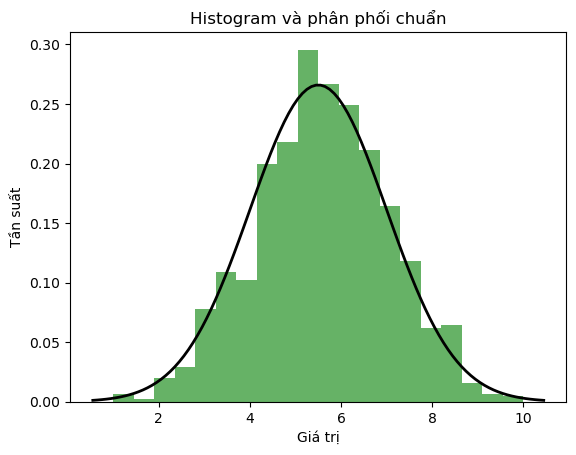

In [19]:
from scipy.stats import norm
mu, sigma = 5.5, 1.5  # Giá trị kỳ vọng và độ lệch chuẩn
sample_size = 1000  # Kích thước mẫu

# Tạo mẫu dữ liệu
data1 = np.random.normal(mu, sigma, sample_size)

# Giới hạn dữ liệu trong khoảng từ 1 đến 10
data1 = np.clip(data1, 1, 10)

# Vẽ histogram để kiểm tra phân phối
plt.hist(data1, bins=20, density=True, alpha=0.6, color='g')

# Vẽ phân phối chuẩn tương ứng
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram và phân phối chuẩn')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

In [24]:
check_normality(data1)

(True,
 'Dữ liệu có thể tuân theo phân phối chuẩn',
 0.9986230890529953,
 0.6366130443102425)

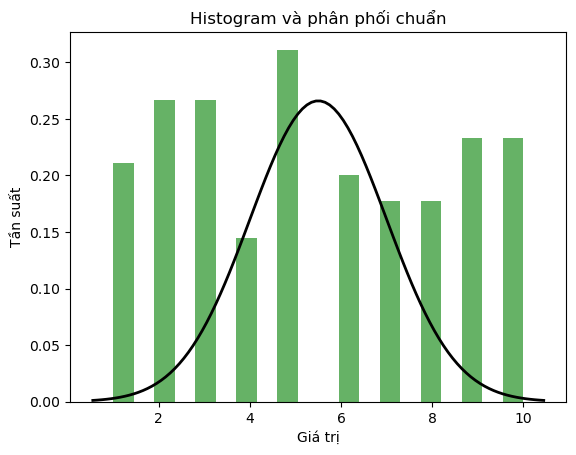

In [26]:
data2 = {'score': np.random.randint(1, 11, size=200)}
df2 = pd.DataFrame(data2)

# Vẽ histogram để kiểm tra phân phối
plt.hist(data2['score'], bins=20, density=True, alpha=0.6, color='g')

# Vẽ phân phối chuẩn tương ứng
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram và phân phối chuẩn')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

In [27]:
data2['score']

array([ 5,  2,  6,  1,  4, 10,  1,  2,  5,  1,  6,  5,  1,  9,  9,  5,  1,
        5,  8,  5,  8,  2,  4,  2, 10,  5,  3,  6,  9,  9,  7,  5, 10,  3,
        1,  6,  3,  7,  6,  3,  5,  9,  7,  8,  3,  5,  5,  3,  9,  7,  9,
        4,  1,  6,  8,  5,  1,  2,  5,  7,  3,  5,  9,  1,  2,  7,  2,  5,
        6,  5,  2,  3,  3,  6,  5,  1,  4,  3,  9,  8,  2,  2,  5,  8,  9,
        5,  1,  8,  3,  2,  8,  3,  4,  1,  6,  9,  6, 10,  7,  2, 10,  3,
       10,  2,  1,  4,  9, 10,  2,  7, 10,  9,  7,  5,  1, 10,  6,  2,  9,
        3, 10, 10, 10,  8,  2,  3, 10,  3,  4,  4,  7,  5,  7,  5,  7,  9,
        3, 10, 10,  9,  2,  3,  5,  7,  6, 10,  2,  6, 10,  4,  1,  8,  8,
       10,  1,  2,  3,  2,  2,  4,  3,  9,  9,  2,  6,  9, 10,  4,  4,  3,
        1,  4,  2,  1,  8,  2,  7,  6,  3,  8,  8,  6,  5,  9,  7,  3,  5,
       10,  9,  8,  3,  8,  6,  7,  5,  5,  1,  6,  5, 10])

In [37]:
# df_math = pd.DataFrame(df['Math'], columns=['Score'])
# df_math
# Đếm số lần xuất hiện của mỗi điểm
# thong_ke_diem = df_math['Score'].value_counts().sort_index()

,Score


In [48]:
# df['Math']
df_math = df['Math']
df_math = pd.DataFrame(df_math)


In [50]:
df_math.columns = ['score']
df_math

,score
0,5.5
1,2.0
2,6.0
3,6.5
4,1.0
...,...
195,10.0
196,1.0
197,5.5
198,5.5


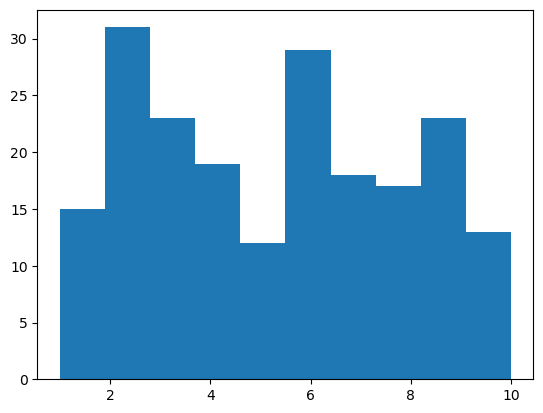

In [62]:
# Vẽ phân phối chuẩn tương ứng
x = df_math.to_numpy()
x
plt.hist(x)
plt.show() 

In [58]:
thong_ke_diem = df_math['score'].value_counts().sort_index()

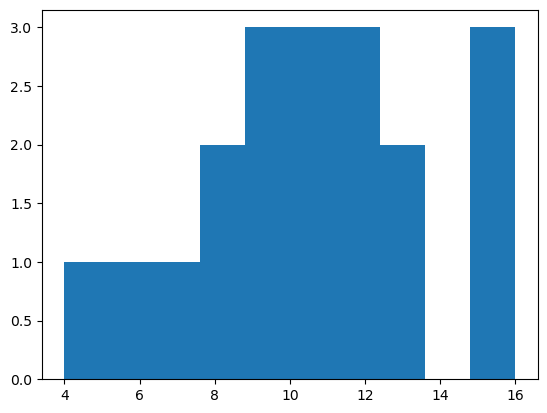

In [64]:
plt.hist(thong_ke_diem.to_numpy().transpose())
plt.show() 